In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_svhn_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_svhn_data()

In [3]:
import network, train, utils
from layers import ReluLayer, TernaryFullyConnectedLayer, \
    TernaryConvolutionLayer, BatchNormLayer, MaxPoolingLayer, DropOutLayer

In [4]:
nn = network.NeuralNetwork(in_size=[None, 32, 32, 3], n_out_classes=10,
                           loss_func=utils.smooth_hinge_loss)
nn.reset_graph()

# Hidden Conv-1
nn.add_layer(TernaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-2
nn.add_layer(TernaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-3
nn.add_layer(TernaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-4
nn.add_layer(TernaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-5
nn.add_layer(TernaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-6
nn.add_layer(TernaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Fc-7
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-8
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-9
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

In [5]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [6]:
opt.set_rho(0.25)
opt.set_ema_rates(0.999)

In [8]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []
sparsity_fracs = []

n_epochs = 200

for t in range(n_epochs):    
    print('Epoch: ', t)
    opt.train_epoch(batch_size=100, ema_decay=0.95, n_output=10, verbose=True)

    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    sparsity_fracs.append(utils.get_sparsity_frac(nn, opt))

    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)
sparsity_fracs = np.asarray(sparsity_fracs)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99905, 0.99905, 0.99905, 0.99905, 0.99905, 0.99905, 0.99905, 0.99905, 0.99905]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.479133, 0.62
Iter: 68 of 682 || Estimated train loss/acc: 0.394341, 0.71
Iter: 136 of 682 || Estimated train loss/acc: 0.370793, 0.74
Iter: 204 of 682 || Estimated train loss/acc: 0.327662, 0.73
Iter: 272 of 682 || Estimated train loss/acc: 0.274440, 0.83
Iter: 340 of 682 || Estimated train loss/acc: 0.215454, 0.91
Iter: 408 of 682 || Estimated train loss/acc: 0.229478, 0.82
Iter: 476 of 682 || Estimated train loss/acc: 0.211744, 0.82
Iter: 544 of 682 || Estimated train loss/acc: 0.190530, 0.88
Iter: 612 of 682 || Estimated train loss/acc: 0.179503, 0.87
Iter: 680 of 682 || Estimated train loss/acc: 0.124550, 0.91
Sparsity fraction (ratio of non-zero weights):  0.7449901148427276
Train loss/acc:  (0.21294128309845223, 0.811286758020

Iter: 476 of 682 || Estimated train loss/acc: 0.043724, 0.93
Iter: 544 of 682 || Estimated train loss/acc: 0.024062, 0.97
Iter: 612 of 682 || Estimated train loss/acc: 0.032854, 0.97
Iter: 680 of 682 || Estimated train loss/acc: 0.033563, 0.95
Sparsity fraction (ratio of non-zero weights):  0.06891328858725018
Train loss/acc:  (0.0502242807410837, 0.9210044472952512) Test loss/acc:  (0.06213008222463824, 0.9066917677195291)
Epoch:  8
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 682 || Estimated train loss/acc: 0.060402, 0.90
Iter: 68 of 682 || Estimated train loss/acc: 0.013623, 1.00
Iter: 136 of 682 || Estimated train loss/acc: 0.023274, 0.97
Iter: 204 of 682 || Estimated train loss/acc: 0.020788, 0.98
Iter: 272 of 682 || Estimated train loss/acc: 0.035899, 0.96
Iter: 340 of 682 || Estimated t

In [9]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True,
                                       max_batch=400))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True,
                                      max_batch=400))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True,
                                     max_batch=400))

Train:  (0.030994274104814007, 0.9558579956695616)
Valid:  (0.04380842596292496, 0.9342000031471253)
Test:  (0.042764995155538894, 0.9382298702320293)


In [10]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  10
Train acc:  0.9558579956695616
Valid acc:  0.9342000031471253
Test acc:  0.9382298702320293


Final results:  [0.03099427 0.955858   0.04380843 0.9342     0.042765   0.93822987]


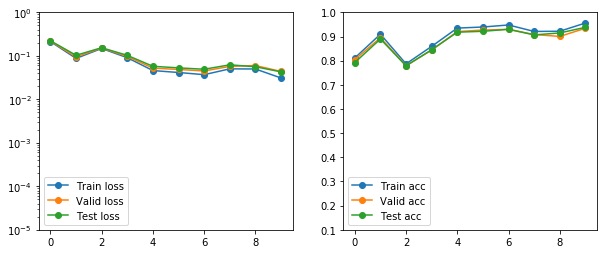

In [11]:
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax1.set_ylim(1e-5,1)
ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])

Final sparsity fraction:  0.07031001602238762


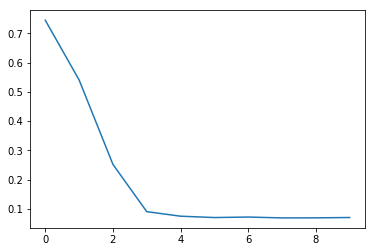

In [12]:
# plot sparsity fracs
plt.plot(sparsity_fracs)
print('Final sparsity fraction: ', sparsity_fracs[-1])